<a href="https://colab.research.google.com/github/SBU-COSMOLIKE/CoCoAGoogleColabExamples/blob/main/Cocoa_Example_(LSST_Y1)_Profile_Likelihoods_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive (optional, does not work with local runtime)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installation

## Install Miniforge

In [ ]:
%%bash
export CONDA_DIR="/content/conda"
mkdir "${CONDA_DIR:?}"
curl -L -O "https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh"
/bin/bash Miniforge3-$(uname)-$(uname -m).sh -f -b -p "${CONDA_DIR:?}"
/bin/bash
source $CONDA_DIR/etc/profile.d/conda.sh \
      && conda config --set auto_update_conda false \
      && conda config --set show_channel_urls true \
      && conda config --set auto_activate_base false \
      && conda config --prepend channels conda-forge \
      && conda config --add allowlist_channels conda-forge \
      && conda config --set channel_priority strict \
      && conda init bash
source ~/.bashrc

PREFIX=/content/conda
Unpacking payload ...
Extracting _libgcc_mutex-0.1-conda_forge.tar.bz2
Extracting ca-certificates-2025.7.14-hbd8a1cb_0.conda
Extracting ld_impl_linux-64-2.44-h1423503_1.conda
Extracting libgomp-15.1.0-h767d61c_3.conda
Extracting pybind11-abi-4-hd8ed1ab_3.tar.bz2
Extracting python_abi-3.12-8_cp312.conda
Extracting tzdata-2025b-h78e105d_0.conda
Extracting _openmp_mutex-4.5-2_gnu.tar.bz2
Extracting libgcc-15.1.0-h767d61c_3.conda
Extracting c-ares-1.34.5-hb9d3cd8_0.conda
Extracting libexpat-2.7.1-hecca717_0.conda
Extracting libffi-3.4.6-h2dba641_1.conda
Extracting libgcc-ng-15.1.0-h69a702a_3.conda
Extracting libiconv-1.18-h4ce23a2_1.conda
Extracting liblzma-5.8.1-hb9d3cd8_2.conda
Extracting libnsl-2.0.1-hb9d3cd8_1.conda
Extracting libstdcxx-15.1.0-h8f9b012_3.conda
Extracting libzlib-1.3.1-hb9d3cd8_2.conda
Extracting ncurses-6.5-h2d0b736_3.conda
Extracting openssl-3.5.1-h7b32b05_0.conda
Extracting reproc-14.2.5.post0-hb9d3cd8_0.conda
Extracting bzip2-1.0.8-h4bc722e_7.c

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 89.5M  100 89.5M    0     0  25.6M      0  0:00:03  0:00:03 --:--:-- 35.4M


## Install Cocoa conda Environment


In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda create -n lockenv -c conda-forge python=3.10 conda-lock=2.* wget --quiet --yes # Google Collab: additional arguments --quite --yes
wget https://raw.githubusercontent.com/CosmoLike/cocoa/refs/heads/dev/cocoapy310-linux.yml

Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /content/conda/envs/lockenv

  added / updated specs:
    - conda-lock=2
    - python=3.10
    - wget


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    annotated-types-0.7.0      |     pyhd8ed1ab_1          18 KB  conda-forge
    appdirs-1.4.4              |     pyhd8ed1ab_1          14 KB  conda-forge
    backports-1.0              |     pyhd8ed1ab_5           7 KB  conda-forge
    backports.tarfile-1.2.0    |     pyhd8ed1ab_1          32 KB  conda-forge
    brotli-python-1.1.0        |  py310hea6c23e_4         346 KB  conda-forge
    ca-certificates-2025.8.3   |       hbd8a1cb_0         151 KB  conda-forge
    cachecontrol-0.14.3        |     pyha770c72_0          23 KB  conda-forge
    cachecontrol-with-filecache-0.14.3|     pyhd8ed1ab_0           7 KB  cond

--2025-09-03 21:03:23--  https://raw.githubusercontent.com/CosmoLike/cocoa/refs/heads/dev/cocoapy310-linux.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100985 (99K) [text/plain]
Saving to: ‘cocoapy310-linux.yml’

     0K .......... .......... .......... .......... .......... 50% 18.2M 0s
    50K .......... .......... .......... .......... ........  100%  153M=0.003s

2025-09-03 21:03:25 (32.2 MB/s) - ‘cocoapy310-linux.yml’ saved [100985/100985]



In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Colab require conda to be loaded at every cell
conda activate lockenv
conda-lock install -n cocoa cocoapy310-linux.yml

INFO:root:Transaction
INFO:root:
INFO:root:  Prefix: /content/conda/envs/cocoa
INFO:root:
INFO:root:  Updating specs:
INFO:root:
INFO:root:   - _libgcc_mutex==0.1=conda_forge
INFO:root:   - git-lfs==3.6.1=h59e48b9_0
INFO:root:   - kernel-headers_linux-64==3.10.0=he073ed8_18
INFO:root:   - libboost-headers==1.85.0=ha770c72_4
INFO:root:   - mpi==1.0=openmpi
INFO:root:   - python_abi==3.10=8_cp310
INFO:root:   - tzdata==2025b=h78e105d_0
INFO:root:   - ca-certificates==2025.1.31=hbd8a1cb_1
INFO:root:   - ld_impl_linux-64==2.43=h712a8e2_5
INFO:root:   - libgcc-devel_linux-64==13.2.0=hdb50d1a_113
INFO:root:   - libgomp==15.1.0=h767d61c_4
INFO:root:   - libstdcxx-devel_linux-64==13.2.0=hdb50d1a_113
INFO:root:   - sysroot_linux-64==2.17=h0157908_18
INFO:root:   - _openmp_mutex==4.5=2_gnu
INFO:root:   - binutils_impl_linux-64==2.43=h4bf12b8_5
INFO:root:   - binutils==2.43=h4852527_5
INFO:root:   - binutils_linux-64==2.43=h4852527_5
INFO:root:   - libgcc==15.1.0=h767d61c_4
INFO:root:   - c-ares=

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Collab require conda to be loaded at every cell
conda activate cocoa                                  # Google Collab require conda to be loaded at every cell
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-gcc "${CONDA_PREFIX}"/bin/gcc
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-g++ "${CONDA_PREFIX}"/bin/g++
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda_cos6-linux-gnu-gfortran "${CONDA_PREFIX}"/bin/gfortran
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda-linux-gnu-gcc-ar "${CONDA_PREFIX}"/bin/gcc-ar
ln -s "${CONDA_PREFIX}"/bin/x86_64-conda-linux-gnu-gcc-ranlib "${CONDA_PREFIX}"/bin/gcc-ranlib
git-lfs install

Git LFS initialized.


## Clone, setup and compile Cocoa (.local) env

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh"        # Google Colab require conda to be loaded at every cell
conda activate cocoa                                  # Google Colab require conda to be loaded at every cell
git clone https://github.com/CosmoLike/cocoa.git --branch v4.02 cocoa

Cloning into 'cocoa'...
Filtering content: 100% (9/9), 265.37 MiB | 28.56 MiB/s, done.


In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source setup_cocoa.sh

SETUP COCOA INSTALLATION PACKAGES 
  SETUP COCOA PRIVATE PYTHON ENV 
  SETUP COCOA PRIVATE PYTHON ENV DONE
  GETTING SPDLOG LIBRARY (CORE LIBS) 
  GETTING SPDLOG LIBRARY (CORE LIBS) DONE
  GETTING ARMA LIBRARY DONE (CORE LIBS) 
  GETTING ARMA LIBRARY DONE (CORE LIBS) DONE
  GETTING CARMA LIBRARY DONE (CORE LIBS) 
  GETTING CARMA LIBRARY DONE (CORE LIBS) DONE
  INSTALLING A FEW PYTHON CORE LIBRARIES VIA PIP 
  INSTALLING PYTHON CORE LIBRARIES VIA PIP DONE
  PIP INSTALL MACHINE LEARNING GPU PACKAGES (takes a while O(5-10min)...) 
  PIP INSTALL MACHINE LEARNING GPU PACKAGES DONE
  SETUP COBAYA 
  SETUP COBAYA DONE
  INSTALLING FGSPECTRA 
  INSTALLING FGSPECTRA DONE
  SETUP SIMONS OBSERVATORY SYSLIBRARY 
  SETUP SIMONS OBSERVATORY SYSLIBRARY DONE
  SETUP SIMONS OBSERVATORY MFLIKE 
  SETUP SIMONS OBSERVATORY MFLIKE DONE
  SETUP ACTDR4 
  SETUP ACTDR4 DONE
  SETUP ACTDR6 (CMBONLY) 
  SETUP ACTDR6 (CMBONLY) DONE
  SETUP ACTDR6 (MFLIKE) 
  SETUP ACTDR6 (MFLIKE) DONE
  SETUP POLYCHORD 
  SETUP 

CosmoRec.v2.0.3b.ta 100%[===================>]  19.81M  5.76MB/s    in 3.4s    
ACT_dr6_likelihood_ 100%[===================>] 344.57M   570KB/s    in 10m 30s 
dr6_data_cmbonly.ta 100%[===================>] 280.26K   246KB/s    in 1.1s    
dr6_data.tar.gz     100%[===================>] 394.06M   569KB/s    in 12m 13s 


In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source compile_cocoa.sh

COMPILING EXTERNAL MODULES 
  COMPILING SPDLOG CPP LIBRARY (CORE LIBS) 
  COMPILING SPDLOG CPP LIBRARY (CORE LIBS) DONE
  COMPILING ARMADILLO CPP LIBRARY (CORE LIBS) 
  COMPILING ARMADILLO CPP LIBRARY (CORE LIBS) DONE
  COMPILING CARMA CPP LIBRARY (CORE LIBS) 
  COMPILING CARMA CPP LIBRARY (CORE LIBS) DONE
  COMPILING COSMOREC RECOMBINATION CODE 
  COMPILING COSMOREC RECOMBINATION CODE DONE
  COMPILING CAMB 
  COMPILING CAMB DONE
  COMPILING PLANCK LIKELIHOOD 
  COMPILING PLANCK LIKELIHOOD DONE
  COMPILING POLYCHORD 
  COMPILING POLYCHORD DONE
  COMPILING FGSPECTRA 
  COMPILING FGSPECTRA DONE
  COMPILING SIMONS OBSERVATORY SYSLIBRARY 
  COMPILING SIMONS OBSERVATORY SYSLIBRARY DONE
  COMPILING SIMONS OBSERVATORY MKLIKE 
  COMPILING SIMONS OBSERVATORY MKLIKE DONE
  COMPILING ACT-DR4 
  COMPILING ACT-DR4 DONE
  COMPILING ACT-DR6 (CMBONLY) 
  COMPILING ACT-DR6 (CMBONLY) DONE
  COMPILING ACT-DR6 (MFLIKE) 
  COMPILING ACT-DR6 (MFLIKE) DONE
  COMPILING NAUTILUS SAMPLER 
  COMPILING NAUTILUS S

##Saving CoCoA on drive (optional, does not work with local runtime)


In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_basic_cocoa.tar.gz"

mkdir -p "$DEST"

if [[ -f "$ARCHIVE" ]]; then
  echo "Backup already exists: $ARCHIVE — skipping."
  exit 0
fi

tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

echo "Created: $ARCHIVE"

Created: /content/drive/MyDrive/ColabBackups/colab_basic_cocoa.tar.gz


tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


# Alternative Installation: Load CoCoA from Drive (does not work with local runtime)


In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_basic_cocoa.tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

Process is interrupted.


# Run Global Minimizer for all LCDM Parameters

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
# ~12 MPIs sweet spot that made GPU utilization ~50%
mpirun -n 12 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    python ./projects/lsst_y1/EXAMPLE_EMUL_MINIMIZE2.py --root ./projects/lsst_y1/ \
        --outroot "EXAMPLE_EMUL_MIN2" --nstw 700

# CheckPoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
mkdir -p "$DEST"
tar -czf "$DEST/colab_test_profilev2_lssty1_lcdm_CHK1_$(date +%F_%H-%M).tar.gz" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

tar: Removing leading `/' from member names
tar: Removing leading `/' from hard link targets


## Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
ARCHIVE=
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

# Run MCMC to get a good covariance

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

# Google Colab requires some tweaks in the mpirun command (compared to our documentation)
# (1) --bind-to core:overload-allowed
# (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
# (3) The new option --allow-run-as-root
mpirun -n 4 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
    --bind-to core:overload-allowed --rank-by slot --map-by slot \
    cobaya-run ./projects/lsst_y1/EXAMPLE_EMUL_MCMC2.yaml -r

# CheckPoint (optional, does not work with local runtime)

## Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
mkdir -p "$DEST"
tar -czf "$DEST/colab_test_profilev2_lssty1_lcdm_CHK2_$(date +%F_%H-%M).tar.gz" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content

## Load Checkpoint

In [3]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/colab_test_profile_lssty1v2_lcdm_CHK2_2025-09-04_01-37.tar.gz"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

tar: content/.config/gce: time stamp 2040-01-01 00:00:00 is 451989638.428044419 s in the future


# Run Profile for all LCDM Parameters

In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

declare -a arr=(0 1 2 3 4 5 6) # parameters to be profiled

for i in "${arr[@]}"; do
  # Google Colab requires some tweaks in the mpirun command (compared to our documentation)
  # (1) --bind-to core:overload-allowed
  # (2) --mca btl tcp,self (instead of --mca btl vader,tcp,self)
  # (3) The new option --allow-run-as-root
  # ~12 MPIs sweet spot that made GPU utilization ~50%
  mpirun -n 12 --allow-run-as-root --oversubscribe --mca pml ^ucx --mca btl tcp,self \
      --bind-to core:overload-allowed --rank-by slot --map-by slot \
      python ./projects/lsst_y1/EXAMPLE_EMUL_PROFILE2.py \
          --root ./projects/lsst_y1/ --cov 'chains/EXAMPLE_EMUL_MCMC2.covmat' \
          --outroot "EXAMPLE_EMUL_PROFILE2" --factor 3 --nstw 700 --numpts 10 \
          --profile ${i} --minfile="./projects/lsst_y1/chains/EXAMPLE_EMUL_MIN2.txt"
done

# CheckPoint (optional, does not work with local runtime)

##Save Checkpoint

In [ ]:
%%bash
DEST="/content/drive/MyDrive/ColabBackups"
mkdir -p "$DEST"
ARCHIVE="$DEST/colab_test_profilev2_lssty1_lcdm_CHK3_$(date +%F_%H-%M).tar.gz"
tar -czf "$ARCHIVE" \
  --exclude='/content/drive' \
  --exclude='**/__pycache__' \
  --exclude='**/.ipynb_checkpoints' \
  /content
echo "Created: $ARCHIVE"

## Load Checkpoint

In [ ]:
%%bash
SENTINEL="/content/conda/etc/profile.d/conda.sh"  # exists when your env is restored
if [[ -e "$SENTINEL" ]]; then
  echo "Found $SENTINEL — environment already restored. Skipping untar."
  exit 0
fi
DEST="/content/drive/MyDrive/ColabBackups"
ARCHIVE="$DEST/xxx"
test -f "$ARCHIVE"
tar -xzf "$ARCHIVE" -C /

# Plot Profile



In [ ]:
%%bash
source "/content/conda/etc/profile.d/conda.sh" # Google Colab require conda to be loaded at every cell
conda activate cocoa                           # Google Colab require conda to be loaded at every cell
cd ./cocoa/Cocoa/                              # Google Colab require conda to be loaded at every cell
source start_cocoa.sh                          # Google Colab require (.local) to be loaded at every cell
export OMP_NUM_THREADS=1                       # Google Colab require (.local) to be loaded at every cell

python - <<'PY'
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math

# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'png'
# ------------------------------------------------------------------------------
fig = plt.figure(figsize=(15.1, 12.1))
# ------------------------------------------------------------------------------
master = gridspec.GridSpec(2,
                           1,
                           height_ratios=[1,1.1],
                           hspace=0.225) # Master grid
top = gridspec.GridSpecFromSubplotSpec(1,
                                       4,
                                       subplot_spec=master[0],
                                       wspace=0.275)
ax = [fig.add_subplot(top[0,i]) for i in range(4)]
bottom = gridspec.GridSpecFromSubplotSpec(1,
                                          3,
                                          subplot_spec=master[1],
                                          wspace=0.35)
ax += [fig.add_subplot(bottom[0,i]) for i in range(3)]
# ------------------------------------------------------------------------------
root = os.environ['ROOTDIR'] + "/projects/lsst_y1/chains/EXAMPLE_EMUL_PROFILE2."
params = ['logA', 'ns', 'omegabh2', 'omegach2', 'thetastar', 'LSST_A1_1', 'LSST_A1_2' ]
latex  = ["$\\log(10^{10} A_\\mathrm{s})$", "$n_\\mathrm{s}$",
          "$100\\Omega_\\mathrm{b} h^2$", "$10\\Omega_\\mathrm{c} h^2$",
          "$100\\theta_*$", "$A_\\mathrm{1-IA,LSST}^1$", "$A_\\mathrm{1-IA,LSST}^2$" ]
# ------------------------------------------------------------------------------
for i in range(7):
    data = np.loadtxt(root + params[i] + '.txt', comments="#",)
    if i == 2:
        data[:,0] = 100*data[:,0]
    if i == 3:
        data[:,0] = 10*data[:,0]
    x  = data[:, 0]
    y  = data[:, 1]-np.min(data[:,1])

    ax[i].plot(x, y,
               marker='D',c='black', linestyle='None', markersize=4,
               alpha=1.0,lw=1.0,
               label=params[i])

    # fit a parabola
    coeffs = np.polyfit(x, y, deg=2)
    xfit = np.linspace(np.min(x), np.max(x), 300)
    yfit = np.polyval(coeffs, xfit)
    ax[i].plot(xfit, yfit, color='blue', lw=1.5, alpha=0.7, label='Parabola fit')
# ------------------------------------------------------------------------------
    ax[i].grid(True)
    ax[i].grid(True,
               which='minor',
               color='black',
               linestyle='--',
               linewidth=0.25,
               alpha=0.1)
    ax[i].minorticks_on()
    ax[i].tick_params(axis='both',
                      which='major',
                      labelsize=15)
    ax[i].tick_params(axis='both',
                      which='minor',
                      labelsize=15)
    ax[i].set_xlabel(latex[i],fontsize = 19)
    if i == 0 or i==4:
        ax[i].set_ylabel('$\\Delta \\chi^2$',fontsize = 19)
    ax[i].set_ylim(np.min(y),np.max(y))
    ax[i].set_xlim(data[0,0]-0.075*(data[-1,0]-data[0,0]),
                   x[-1]+0.075*(x[-1]-x[0]))
# ------------------------------------------------------------------------------
    # get 1σ, 2σ and 3σ - print as vertical lines
    sigma_lines = {}
    for y0 in [1, 4, 9]:
        a, b, c = coeffs
        roots = np.roots([a, b, c - y0])
        real_roots = [np.real(r) for r in roots if np.isreal(r)]
        if len(real_roots) == 2:
            sigma_lines[y0] = sorted(real_roots)
            for r in real_roots:
                ax[i].axvline(x=r,
                              linestyle='--',
                              color='grey',
                              alpha=0.5,
                              lw=1.0)
    # Build annotation text
    lmap = {1: "1σ", 4: "2σ", 9: "3σ"}
    tlines = []
    prec = max(0, int(-math.floor(math.log10(x[-1] - x[0]))) + 1)
    for y0 in [1, 4, 9]:
        if y0 in sigma_lines:
            lo, hi = sigma_lines[y0]
            tlines.append(f"{lmap[y0]}: [{lo:.{prec}f}, {hi:.{prec}f}]")
    ax[i].text(
        0.5,
        0.90,
        "\n".join(tlines),
        transform=ax[i].transAxes,
        fontsize=11,
        va='top', ha='center',
        bbox=dict(boxstyle="round",
                  facecolor='white',
                  alpha=0.8,
                  edgecolor='black'))
# ------------------------------------------------------------------------------
plt.subplots_adjust(bottom=0.25, left = 0.2)
plt.savefig(os.environ['ROOTDIR'] + "/projects/lsst_y1/chains/EXAMPLE_PLOT_PROFILE2.png")
# From GPT: hard-close to avoid destructor noise in Colab
import gc
plt.close('all')
gc.collect()
PY

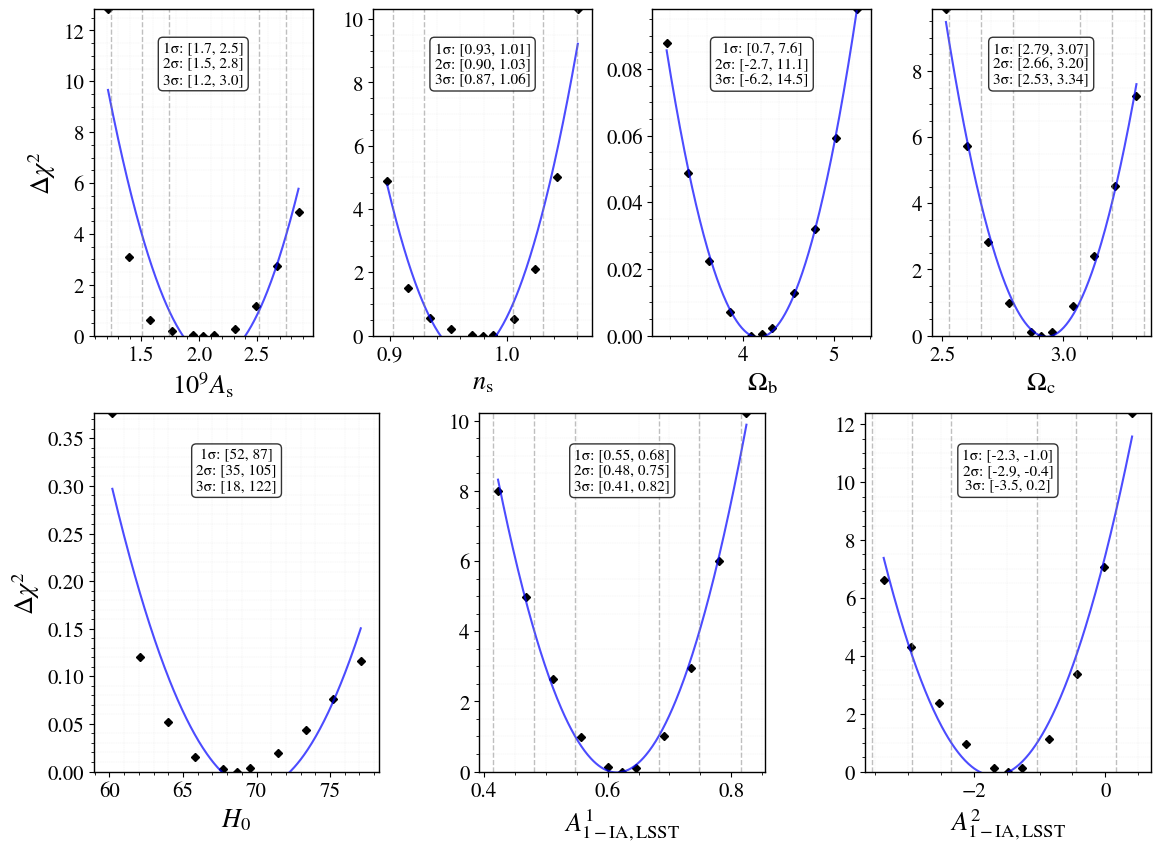

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/cocoa/Cocoa/projects/lsst_y1/chains/EXAMPLE_PLOT_PROFILE2.png"))